In [1]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset = r'C:\Users\isaac\Downloads\extracted_data\train'
dataset

'C:\\Users\\isaac\\Downloads\\extracted_data\\train'

In [3]:
import pathlib
data_dir = pathlib.Path(dataset)
data_dir

WindowsPath('C:/Users/isaac/Downloads/extracted_data/train')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Cats/cat.9411.jpg'),
 WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Cats/cat.9412.jpg'),
 WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Cats/cat.9413.jpg'),
 WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Cats/cat.9414.jpg'),
 WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Cats/cat.9415.jpg')]

In [5]:
len(list(data_dir.glob('*/*.jpg')))

708

In [6]:
dogs = list(data_dir.glob('Dogs/*.jpg'))

In [7]:
cats = list(data_dir.glob('Cats/*.jpg'))

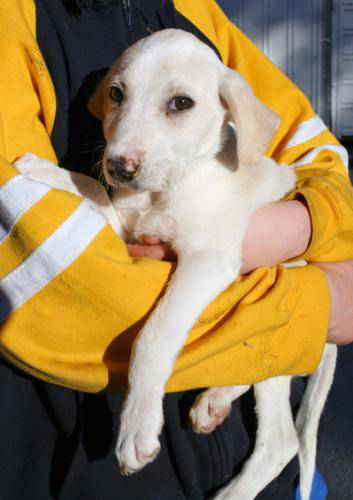

In [8]:
PIL.Image.open(str(dogs[50]))

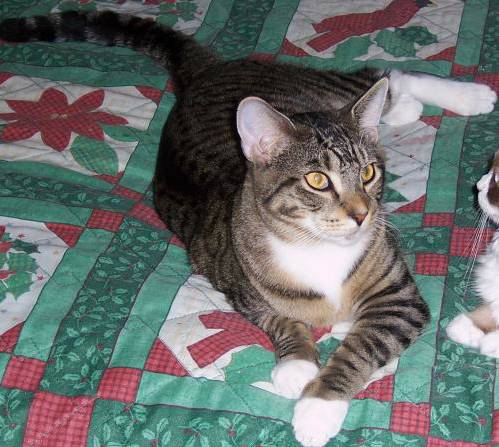

In [9]:
PIL.Image.open(str(cats[31]))

In [10]:
dogsvscats_images = {
    'dogs' : list(data_dir.glob('Dogs/*.jpg')),
    'cats' : list(data_dir.glob('Cats/*.jpg'))
}

In [11]:
dogsvscats_labels = {
    'dogs' : 1,
    'cats' : 0
}

In [12]:
dogsvscats_images['dogs'][:3]

[WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Dogs/dog.8750.jpg'),
 WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Dogs/dog.8751.jpg'),
 WindowsPath('C:/Users/isaac/Downloads/extracted_data/train/Dogs/dog.8752.jpg')]

In [13]:
image = cv2.imread(str(dogsvscats_images['dogs'][0]))

In [14]:
image.shape

(199, 246, 3)

In [15]:
image = cv2.imread(str(dogsvscats_images['dogs'][40]))

In [16]:
image.shape

(335, 448, 3)

In [17]:
X, y = [], []

for name, images in dogsvscats_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(dogsvscats_labels[name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.svm import SVC

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

In [22]:
X_train = X_train_flatten/255.0
X_test = X_test_flatten/255.0

In [23]:
model = SVC()

In [24]:
model.fit(X_train,y_train)

SVC()

In [25]:
model.score(X_test,y_test)

0.807909604519774

In [26]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.81      1.00      0.89       143

    accuracy                           0.81       177
   macro avg       0.40      0.50      0.45       177
weighted avg       0.65      0.81      0.72       177



C:\Users\isaac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isaac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isaac\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
